In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

<AxesSubplot: xlabel='BuildingArea', ylabel='Price'>

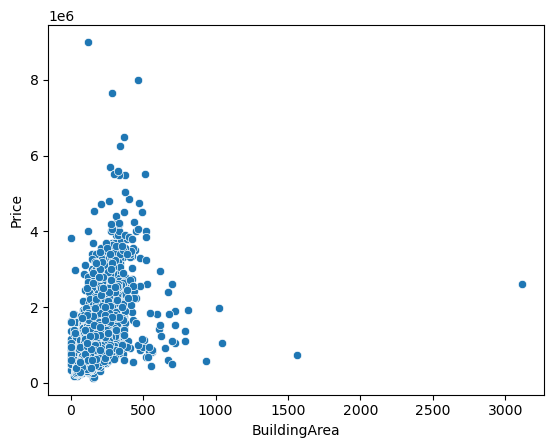

In [27]:
data = pd.read_csv('data/melb_data.csv')
data = data.dropna(axis=0)
data = data[['BuildingArea', 'Price']]
sns.scatterplot(x='BuildingArea', y='Price', data=data)

In [28]:
X = np.array([[1, x] for x in data['BuildingArea']])
Y = np.array(data['Price'])

theta = np.linalg.solve(X.T@X, X.T@Y)
print(f"analytische Lösung: {theta}")

analytische Lösung: [510531.72552189   3943.64499525]


In [29]:
%%time
alpha = 0.00007
rounds = 1500000
desc_theta = np.array([200000, 2000])

# log_interval = rounds*0.1
# print(f"Start: {desc_theta}")
for i in tqdm(range(1, rounds + 1)):
    desc_theta = desc_theta + alpha / len(X) * np.sum((Y - X@desc_theta) * X.T, axis=1)
    # if i % log_interval == 0:
    #     print(f"Runde {i}: {desc_theta}")

100%|██████████| 1500000/1500000 [07:19<00:00, 3410.86it/s]

CPU times: user 42min 30s, sys: 6min 16s, total: 48min 47s
Wall time: 7min 19s


In [30]:
price287 = desc_theta[0] + desc_theta[1]*287
print(f"Preisvorhersage für 287m²: {price287}")
print(f"Analytische Lösung: {theta[0] + theta[1]*287}")

Preisvorhersage für 287m²: 1642357.8391597958
Analytische Lösung: 1642357.839159178


<AxesSubplot: xlabel='BuildingArea', ylabel='Price'>

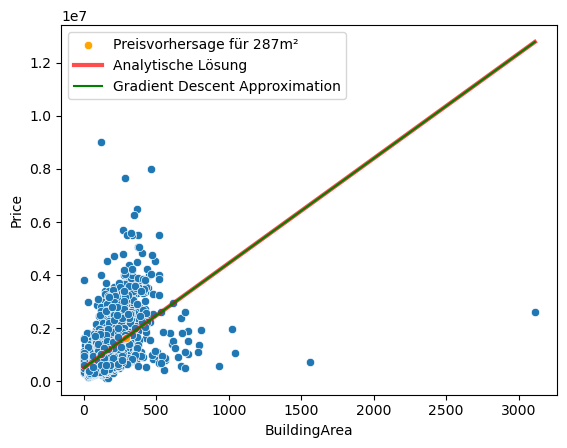

In [31]:
sns.scatterplot(x='BuildingArea', y='Price', data=data)
sns.scatterplot(x=[287], y=[price287], label='Preisvorhersage für 287m²', color='orange')
theta_line = [theta[0] + theta[1]*x for x in data['BuildingArea']]
desc_theta_line = [desc_theta[0] + desc_theta[1]*x for x in data['BuildingArea']]
sns.lineplot(x=data['BuildingArea'], y=theta_line, label='Analytische Lösung', color='red', linewidth=3, alpha=0.7)
sns.lineplot(x=data['BuildingArea'], y=desc_theta_line, label='Gradient Descent Approximation', color='green')